In [11]:
from pathlib import Path
from tempfile import TemporaryDirectory

import matplotlib.pyplot as plt
import numpy as np
import scipy.io

import suite2p
from suite2p import run_s2p, default_ops
ops = default_ops() # populates ops with the default options
import sys
sys.path.insert(0, 'C:/Users/lan/Documents/repos/suite2p') # option to import from github folder

import matplotlib as mpl
mpl.rcParams.update({
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'legend.frameon': False,
    'figure.subplot.wspace': .01,
    'figure.subplot.hspace': .01,
    'figure.figsize': (18, 13),
    'ytick.major.left': False,
})
jet = mpl.cm.get_cmap('jet')
jet.set_bad(color='k')

C:\Users\lan\anaconda3\envs\suite2p\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))


In [2]:
t = 'D:\Lan_temp\suite2p\plane0_i1322_200803_002'
output_op_file = np.load(Path(t).joinpath('ops.npy'), allow_pickle=True).item()

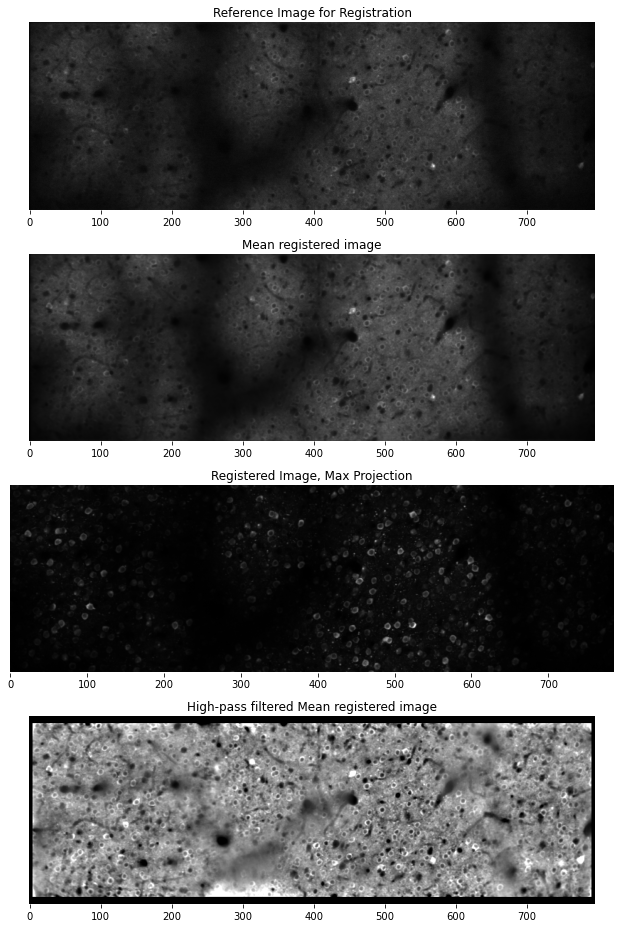

In [6]:
output_op = output_op_file

plt.subplot(4, 1, 1)
plt.imshow(output_op['refImg'], cmap='gray', )
plt.title("Reference Image for Registration");

plt.subplot(4, 1, 3)
plt.imshow(output_op['max_proj'], cmap='gray')
plt.title("Registered Image, Max Projection");

plt.subplot(4, 1, 2)
plt.imshow(output_op['meanImg'], cmap='gray')
plt.title("Mean registered image")

plt.subplot(4, 1, 4)
plt.imshow(output_op['meanImgE'], cmap='gray')
plt.title("High-pass filtered Mean registered image");

plt.tight_layout()

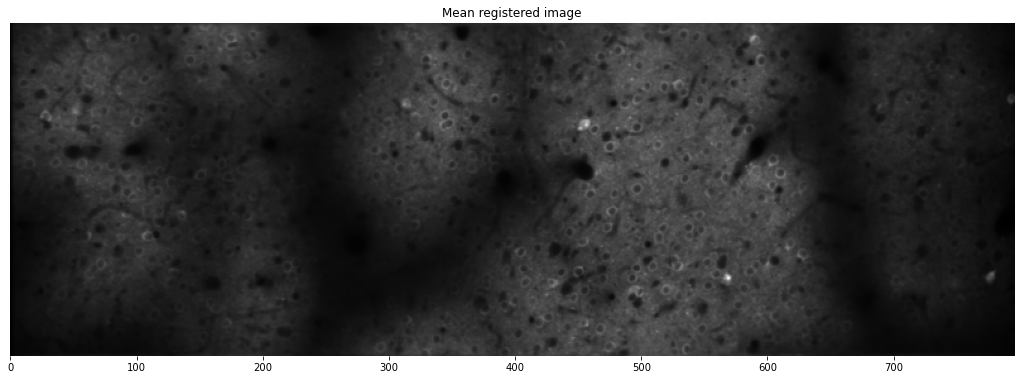

In [8]:
plt.imshow(output_op['meanImg'], cmap='gray')
plt.title("Mean registered image");

In [10]:
type(output_op['meanImg'])

numpy.ndarray

In [14]:
scipy.io.savemat('suite2p_reg_mean_img.mat', {'reg_img_mean': output_op['meanImg']})

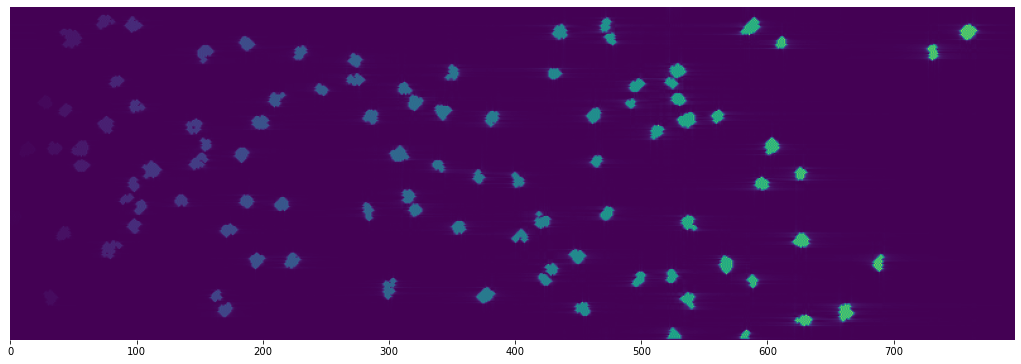

In [25]:
from scipy.io import loadmat
segment_ref = loadmat('mask_cell_shift_align.mat')
tt = segment_ref['mask_align']
# tt.shape
plt.imshow(tt)

C:\Users\lan\anaconda3\envs\suite2p\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: All-NaN slice encountered


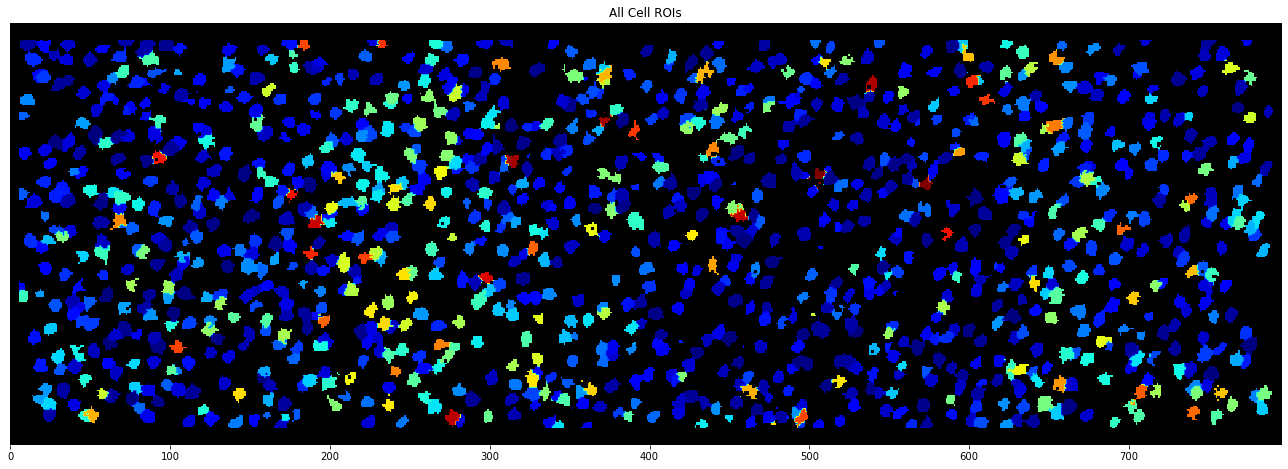

In [19]:
t = 'D:\Lan_temp\suite2p\plane0_i1322_200803_002'
output_op = np.load(Path(t).joinpath('ops.npy'), allow_pickle=True).item()
output_op['save_path'] = t

# f_cells = np.load(Path(output_op['save_path']).joinpath('F.npy'))
# f_neuropils = np.load(Path(output_op['save_path']).joinpath('Fneu.npy'))
# spks = np.load(Path(output_op['save_path']).joinpath('spks.npy'))

stats_file = Path(output_op['save_path']).joinpath('stat.npy')
stats = np.load(stats_file, allow_pickle=True)
iscell = np.load(Path(output_op['save_path']).joinpath('iscell.npy'), allow_pickle=True)[:, 0].astype(bool)
# iscell.shape

im = suite2p.ROI.stats_dicts_to_3d_array(stats, Ly=output_op['Ly'], Lx=output_op['Lx'], label_id=True)
im[im == 0] = np.nan

plt.imshow(np.nanmax(im[iscell], axis=0), cmap='jet')
plt.title("All Cell ROIs");

plt.tight_layout();

C:\Users\lan\anaconda3\envs\suite2p\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: All-NaN slice encountered
  """Entry point for launching an IPython kernel.


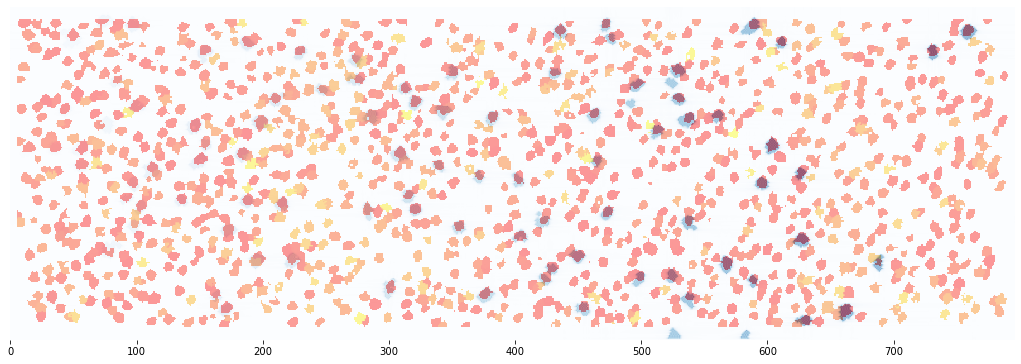

In [26]:
segment_suite2p = np.nanmax(im[iscell], axis=0)
segment_suite2p.shape
# segment_suite2p_flat = segment_suite2p.copy()

im1 = plt.imshow(segment_suite2p, cmap='autumn', alpha=0.8)
im2 = plt.imshow(tt, cmap='Blues', alpha=0.5)
plt.show()